In [205]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
import math as math

# Problem 0: some fake data to mess with

#### So let's start by making some fake background data.

In [206]:
t = np.linspace(0,np.pi*100,np.int(1e5))

N = 10+np.sin(t)
bkgd = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N)+N

<ipython-input-206-15bde96dd92a>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t = np.linspace(0,np.pi*100,np.int(1e5))
<ipython-input-206-15bde96dd92a>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.2

# Problem 1: Subsets of Data

#### The idea here is to plot small portions of the data. In python this is often called array slicing, but in other languages it has no special terminology. Your goal is to figure out how to make the following plots:

### 1a) Make a scatter plot (not a line plot) of the first 1000 data points.

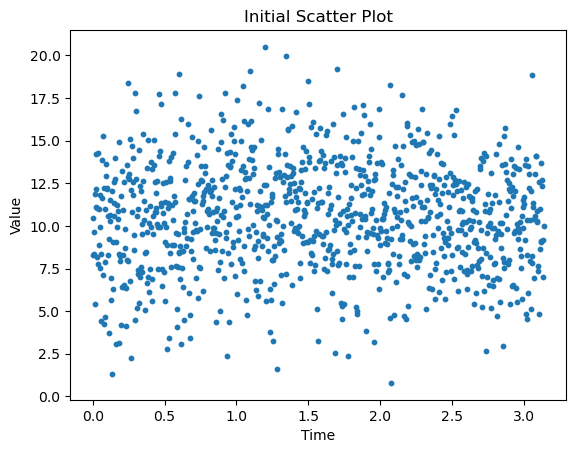

In [207]:
t1000 = t[0:1000]
bkgd1000 = bkgd[0:1000]
plt.scatter(t1000,bkgd1000, marker='o', s = 10)
plt.title('Initial Scatter Plot')
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()

### 1b) Generalize your code so you can make a plot of any X contiguous points (e.g. 2000 points starting at point 500), and produce an example plot of a set of data somethere in the middle of your array

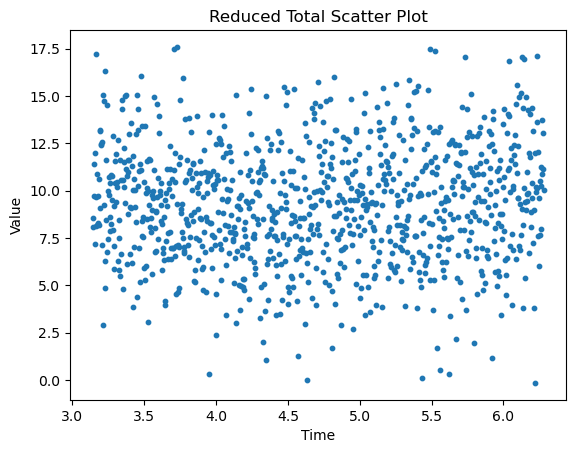

In [208]:
L =1000
U = 2000

t1000 = t[L:U]
bkgd1000 = bkgd[L:U]
plt.scatter(t1000,bkgd1000, marker='o', s = 10)
plt.title('Reduced Total Scatter Plot')
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()

### 1c) Sometimes you want to sample the data, such as plotting every 100th point. Make a plot of the full data range, but only every 100th point.

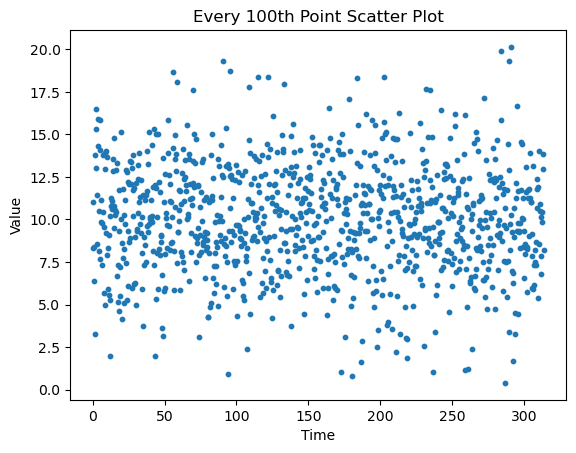

In [209]:
t1000 = t[::100]
bkgd1000 = bkgd[::100]
plt.scatter(t1000,bkgd1000, marker='o', s = 10)
plt.title('Every 100th Point Scatter Plot')
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()

# PROBLEM 2: Density

### Now you can make a scatter plot of just a 100,000 points, so you might try it to see what it looks like. But particularly in the central areas the points all overlap into just a blob, and this just gets worse as the number of points goes up. What is better is to plot the density of the points. There are several ways of doing this, but a 2D histogram plot is the easiest (plt.hist2d() in python and histogram2() in MatLab).

#### 2a) Make a 2d histogram plot. Read about options, and play with binsize so it is useful (too large a bin and everything washes out, too small and the sample noise dominates). Make sure you use a colorbar.

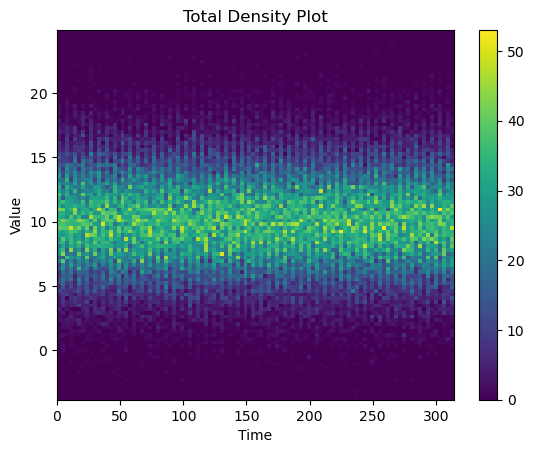

In [210]:
plt.hist2d(t,bkgd, bins = 100, density = False)
plt.colorbar()
plt.title('Total Density Plot')
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()

### 2b) Clearly explain what is being plotted in your plot (e.g. what does each color mean?)

This is a 2D histogram plot. The frequency of points are shown as a field with color as a visual aid to see the frequency. Color bar is included to show the value of specific regions.

# PROBLEM 3: Folding

### 3a) Make an new time variable that folds at a period of 2π (the modulo operator is your friend, variably expressed as mod(), %, or rem()). Then make a scatter plot of all your data, but now folded. (Reminder, for more data you'd never actually want to plot all the points.)

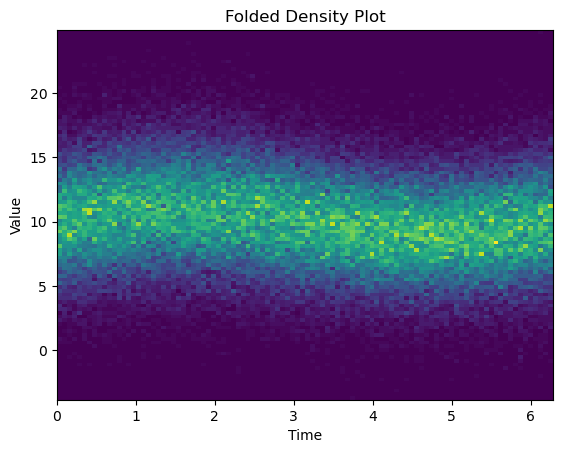

In [229]:
t_1 = t % (math.pi*2)
plt.hist2d(t_1,bkgd, bins =100)
plt.title('Folded Density Plot')
plt.ylabel('Value')
plt.xlabel('Time')

plt.show()


### 3c) You can use 2D histograms or digitize functions, plus some math, to calculate the average as a function of the folded variable. You can then overplot this on 3b to show the average as a function of folded time.

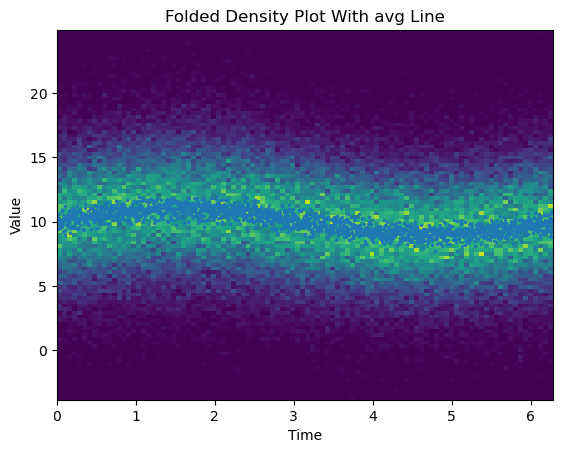

In [230]:
t_1 = t % (math.pi*2)
plt.hist2d(t_1,bkgd, bins =100)
plt.title('Folded Density Plot With avg Line')
plt.ylabel('Value')
plt.xlabel('Time')
binned_stats = stats.binned_statistic(x = t_1, values = bkgd, statistic = ("mean"), bins = 2000, range =(0,2*math.pi))
plt.scatter(t[:2000],binned_stats.statistic, s = 2)
plt.show()